In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
from pyndamics import Simulation
from pyndamics.emcee import *

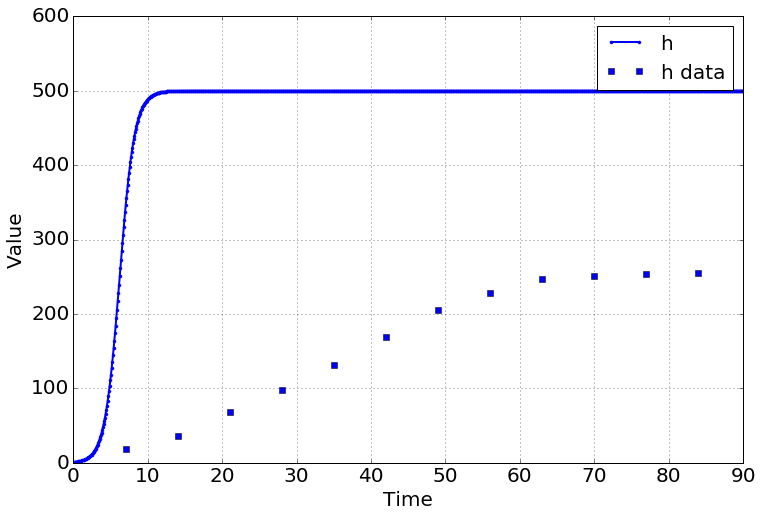

In [7]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

sim=Simulation()
sim.add("h'=a*h*(1-h/K)",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1,K=500)
sim.run(0,90)

# fig=sim.figures[0]
# fig.savefig('sunflower_logistic1.pdf')
# fig.savefig('sunflower_logistic1.png')

In [8]:
model=MCMCModel(sim,
                a=Uniform(.001,5),
                K=Uniform(100,500),
                initial_h=Uniform(0,100),
                )

In [11]:
model.run_mcmc(500)
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)

Running MCMC...
Done.
23.89 s
Running MCMC...
Done.
26.14 s


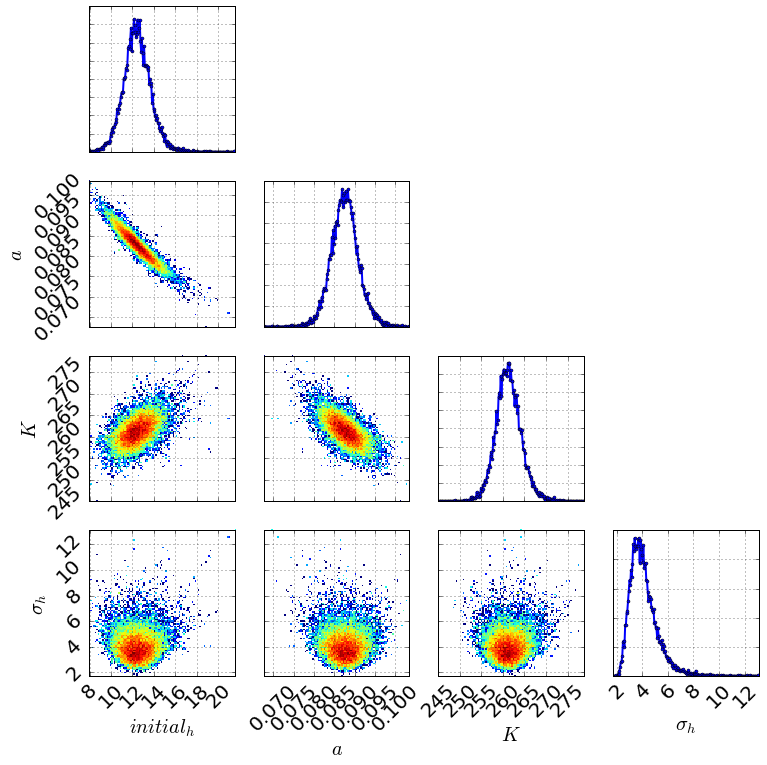

In [12]:
model.triangle_plot()